In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

In [3]:
(trainX, trainy), (testX, testy) = mnist.load_data()

In [5]:
trainX.shape, trainy.shape, testX.shape, testy.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

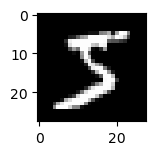

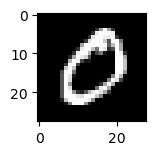

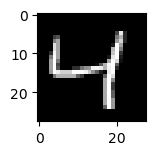

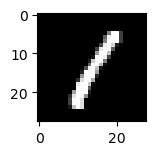

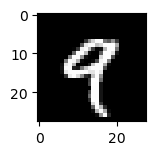

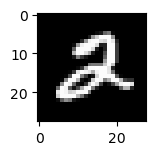

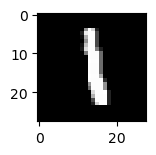

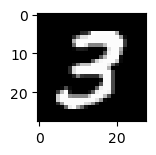

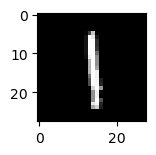

In [6]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
    plt.show()

In [9]:
trainy

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
x_train = trainX.reshape(-1, 28*28)

In [13]:
x_train.shape

(60000, 784)

In [14]:
x_test = testX.reshape(-1, 28*28)
x_test.shape

(10000, 784)

In [10]:
rfc = RandomForestClassifier()


In [15]:
rfc.fit(x_train, trainy)

RandomForestClassifier()

In [18]:
y_pred = rfc.predict(x_test)

In [19]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [20]:
accuracy_score(testy, y_pred)

0.9686

In [22]:
precision_score(testy, y_pred, average='macro')

0.9684254003220751

In [23]:
recall_score(testy, y_pred, average="macro")

0.9683212812977248

In [24]:
f1_score(testy, y_pred, average="macro")

0.9683564949178859

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

In [26]:
confusion_matrix(testy, y_pred)

array([[ 968,    0,    0,    0,    0,    3,    4,    1,    3,    1],
       [   0, 1123,    2,    2,    0,    1,    4,    0,    2,    1],
       [   6,    0,  998,    6,    3,    0,    3,    9,    7,    0],
       [   0,    0,   11,  971,    0,    7,    0,    9,   10,    2],
       [   1,    0,    2,    0,  956,    0,    4,    0,    2,   17],
       [   3,    1,    0,   15,    4,  856,    5,    2,    5,    1],
       [   6,    3,    1,    1,    4,    4,  935,    0,    4,    0],
       [   0,    3,   21,    2,    1,    1,    0,  985,    2,   13],
       [   4,    0,    4,    9,    4,    6,    4,    3,  931,    9],
       [   6,    5,    2,   10,    9,    3,    1,    4,    6,  963]],
      dtype=int64)

In [28]:
print(classification_report(testy, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.97       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [29]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

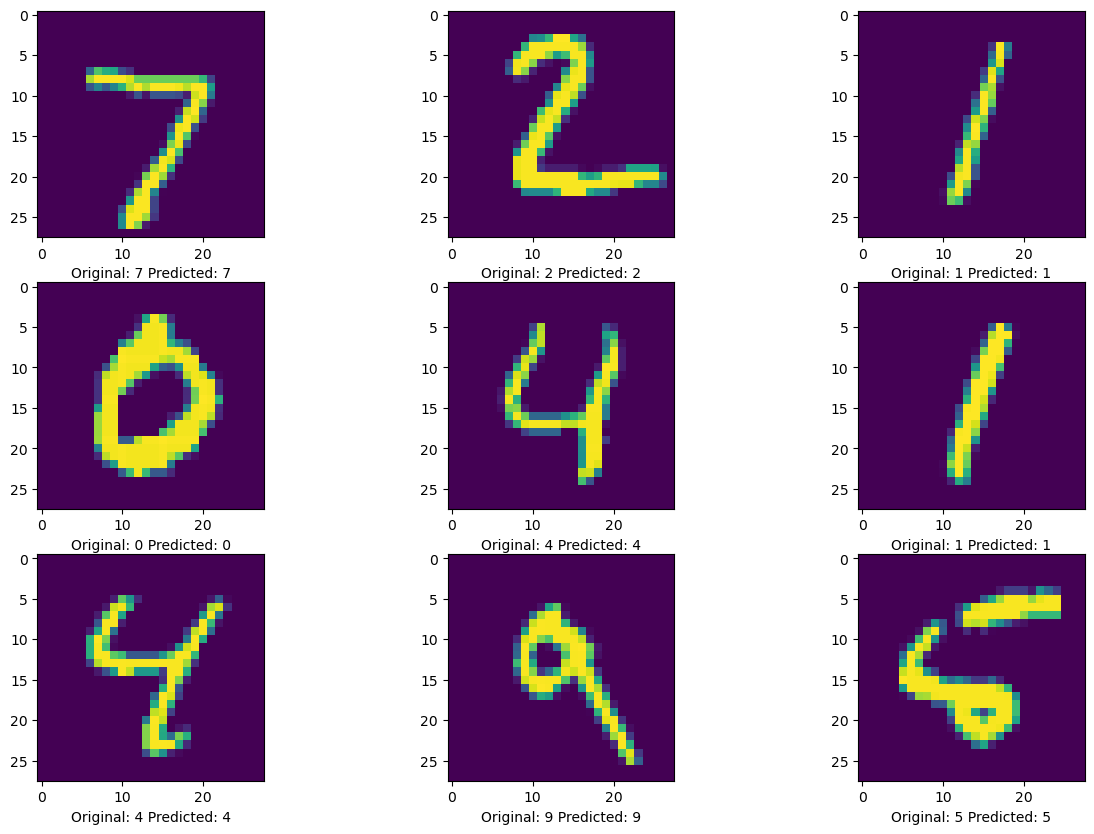

In [37]:
plt.figure(figsize=(15, 10))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    plt.xlabel(f'Original: {testy[i]} Predicted: {y_pred[i]}')

    plt.imshow(testX[i])
    
plt.show()